In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, 
roc_curve, precision_recall_curve,roc_auc_score,accuracy_score)
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler,SMOTE

import torch
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [4]:
data_path = 'df_holdout_scholarjet.csv'

rawdata_test = pd.read_csv(data_path,index_col = 0)
rawdata_train = pd.read_csv('df_training_scholarjet.csv',index_col = 0)

In [5]:
rawdata_train.shape,rawdata_test.shape


((28126, 183), (30375, 181))

## data umbanlance

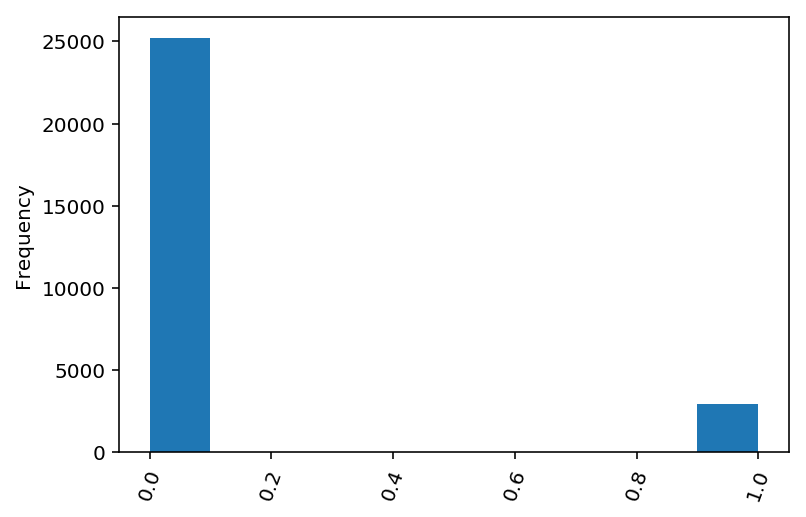

In [6]:
rawdata_train['convert_30'].plot(kind='hist', rot=70,)

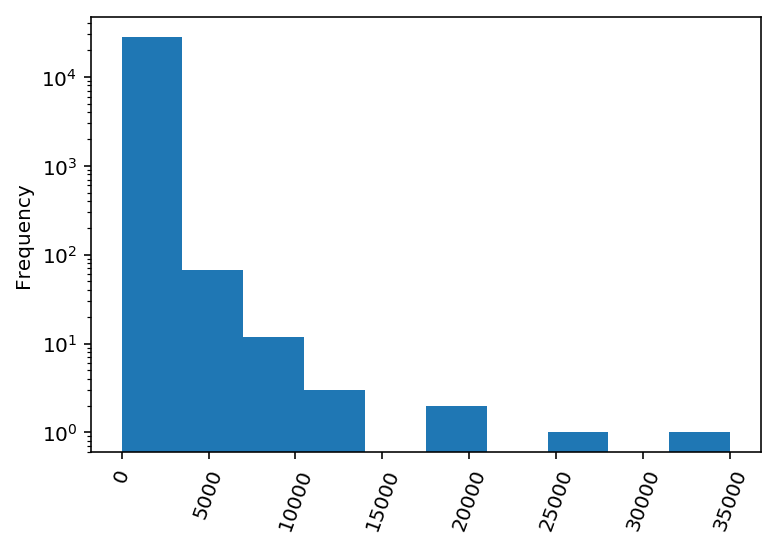

In [7]:
rawdata_train['revenue_30'].plot(kind='hist', rot=70, logy=True)

In [8]:
rawdata_train = rawdata_train.replace('NaN',np.NaN)
rawdata_train.fillna(rawdata_train.mean(), inplace=True)
print(rawdata_train.isnull().sum())

cuid                            0
convert_30                      0
revenue_30                      0
roll_up                         0
currentstatus                   0
companytypegroup                0
team                            0
customersource                  0
accrole                         0
num_employees                   0
num_purchases_year              0
cost_purchases_year             0
enrollmentmethod                0
numorderone                     0
numorderthreeone                0
numorderseventhree              0
numorderthirtyseven             0
numordersixtythirty             0
numorderyearsixty               0
sumrevone                       0
sumrevthreeone                  0
sumrevseventhree                0
sumrevthirtyseven               0
sumrevsixtythirty               0
sumrevyearsixty                 0
numbamorder                     0
numselforder                    0
totalrev                        0
aov                             0
dayssincelasto

## Dummy Variable 

In [9]:
dummy_fields = ['roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']
for i in dummy_fields:
    print(rawdata_train[i].value_counts())
rawdata_train.head()

Unmanaged     14748
Onboarding     9986
Retention      3392
Name: roll_up, dtype: int64
Enrolled       18199
Active          9918
In Progress        8
Unconfirmed        1
Name: currentstatus, dtype: int64
Business    22748
Trade        5378
Name: companytypegroup, dtype: int64
US    25799
CA     2327
Name: team, dtype: int64
Internal Application        10888
Internal Customer Scrape     5849
Social - Paid                3203
External Application         3032
Search - Paid                2113
Affiliates                   1523
Other                         904
Referral                      300
Bulk Upload                   124
Email                         105
Display - Acquisition          27
Quotes                         20
Gateway                        19
Display - Retargeting          14
Self ID                         3
Partners                        2
Name: customersource, dtype: int64
None         14849
Primary      10484
Purchaser     2747
Other           46
Name: accrole, dt

,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,num_employees,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
1,20,0,0.0,Onboarding,Active,Business,US,External Application,None,50plus,...,0.000000,0.0,0.0,0.0,0.190476,0.000000,0.000000,3.000000,1.000000,17
2,57,0,0.0,Onboarding,Active,Business,US,Internal Application,None,2to5,...,0.020000,0.0,0.0,0.0,0.040000,0.000000,0.020000,3.000000,1.000000,70
3,163,0,0.0,Onboarding,Active,Business,US,Internal Application,None,1,...,0.106195,0.0,0.0,0.0,0.000000,0.000000,0.001770,13.000000,1.000000,27
4,167,0,0.0,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,50plus,...,0.100000,0.0,0.0,0.0,0.000000,0.000000,0.100000,5.087619,1.332081,25
5,168,0,0.0,Onboarding,Enrolled,Business,US,Gateway,None,6to10,...,0.072072,0.0,0.0,0.0,0.009524,0.016807,0.003465,8.333333,3.000000,33


In [10]:
for each in dummy_fields:
    dummies = pd.get_dummies(rawdata_train[each], prefix=each, drop_first=False)
    rawdata_train = pd.concat([rawdata_train, dummies], axis=1)
rawdata_train.shape

(28126, 238)

In [11]:
rawdata_train.head() # 238 columns

,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,num_employees,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
1,20,0,0.0,Onboarding,Active,Business,US,External Application,None,50plus,...,0,0,0,1,1,0,0,0,0,0
2,57,0,0.0,Onboarding,Active,Business,US,Internal Application,None,2to5,...,1,0,0,0,1,0,0,0,0,0
3,163,0,0.0,Onboarding,Active,Business,US,Internal Application,None,1,...,0,0,0,0,1,0,0,0,0,0
4,167,0,0.0,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,50plus,...,0,0,0,1,1,0,0,0,0,0
5,168,0,0.0,Onboarding,Enrolled,Business,US,Gateway,None,6to10,...,0,1,0,0,1,0,0,0,0,0


In [12]:
fields_to_drop = ['cuid', 'roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']
data = rawdata_train.drop(fields_to_drop, axis=1)
data.head()# 227 columns

,convert_30,revenue_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
1,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,0,0
3,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,0,0,1,1,0,0,0,0,0
5,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,1,0,0,1,0,0,0,0,0


In [13]:
data.to_csv('dummy_data.csv') #runing this data in model.py

In [14]:
data = pd.read_csv('dummy_data.csv',index_col = 0)
data.head()
data = data[data['convert_30'] == 1]
data.describe().to_csv('quan.csv')


In [15]:
data.head()

,convert_30,revenue_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
14,1,323.97,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0,1,0,0,1,0,0,0,0,0
59,1,34.94,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,0,0,0,1,0,0,0,0,0
78,1,4398.06,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,1,0,0,0,0,0,0,0,1
94,1,1905.63,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,0,0,0,1,0,0,0,0,0
97,1,2022.69,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,1,0,0,1,0,0,0,0,0


In [16]:
drop_list = ['convert_30','numtasksotherone','numtasksotherthreeone','numtasksotherseventhree','numtasksotherthirtyseven',
             'numtasksothersixtythirty','numtasksotheryearsixty','decmakerflagone','decmakerflagsevenone',
             'decmakerflagfourteenseven','decmakerflagthirtyfourteen','currentstatus_Unconfirmed','customersource_Display - Acquisition',
            'customersource_Display - Retargeting','customersource_Self ID']
## useless for regression 



In [17]:
data1= data.drop(drop_list,axis =1)
#quant_features = list(data1.columns)[:161]
#quant_features.pop(0)

In [18]:
features,targets_2 = torch.from_numpy(data1.drop('revenue_30', axis=1).values).float(),torch.from_numpy(data1['revenue_30'].values.reshape(-1,1)).float()

data_r = [(x,y) for x,y in zip(features, targets_2)]


from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
valid_size =.2

num_train = len(data_r)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

batch_size = 32
num_workers = 0
train_loader = torch.utils.data.DataLoader(data_r, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(data_r, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

In [19]:
data1.shape

(2928, 212)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self,in_feature,input_nodes, hidden_nodes, output_nodes):
        super(Net, self).__init__() #材料准备好了

        self.fc1 = nn.Linear(in_feature,input_nodes)
        self.fc2 = nn.Linear(input_nodes,hidden_nodes)
        self.fc3 = nn.Linear(hidden_nodes,output_nodes)
        self.drop = nn.Dropout(0.3)

    def forward(self, x): # 按顺序摆放材料！
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        x = self.fc3(x) 
        
        return x
model = Net(211,512,64,1)
print(model)




Net(
  (fc1): Linear(in_features=211, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (drop): Dropout(p=0.3)
)


In [21]:
import torch.optim as optim

# specify loss function
criterion = nn.MSELoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(),lr = .02)

In [22]:
n_epochs = 300 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        #print(target.size())
        #print(output.size())
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {} \tValidation Loss: {}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({} --> {}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_wayfair.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: nan 	Validation Loss: nan
Epoch: 2 	Training Loss: nan 	Validation Loss: nan
Epoch: 3 	Training Loss: nan 	Validation Loss: nan
Epoch: 4 	Training Loss: nan 	Validation Loss: nan
Epoch: 5 	Training Loss: nan 	Validation Loss: nan
Epoch: 6 	Training Loss: nan 	Validation Loss: nan
Epoch: 7 	Training Loss: nan 	Validation Loss: nan
Epoch: 8 	Training Loss: nan 	Validation Loss: nan
Epoch: 9 	Training Loss: nan 	Validation Loss: nan
Epoch: 10 	Training Loss: nan 	Validation Loss: nan
Epoch: 11 	Training Loss: nan 	Validation Loss: nan
Epoch: 12 	Training Loss: nan 	Validation Loss: nan
Epoch: 13 	Training Loss: nan 	Validation Loss: nan
Epoch: 14 	Training Loss: nan 	Validation Loss: nan
Epoch: 15 	Training Loss: nan 	Validation Loss: nan
Epoch: 16 	Training Loss: nan 	Validation Loss: nan
Epoch: 17 	Training Loss: nan 	Validation Loss: nan
Epoch: 18 	Training Loss: nan 	Validation Loss: nan
Epoch: 19 	Training Loss: nan 	Validation Loss: nan
Epoch: 20 	Training L

KeyboardInterrupt: 

In [23]:
model.load_state_dict(torch.load('model_wayfair.pt'))

flatten = lambda l: [item for sublist in l for item in sublist]
true = []
pred = []
model.eval()
for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    #print(data.size())
    output = model(data)
    #print(output.view(1,-1).detach().numpy(),n)
    
    pred.append(output.detach().numpy())



In [25]:
test = pd.read_csv('answer1.csv',index_col=0)
test.head()

,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,sumrevseventhree,sumrevthirtyseven,...,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone,pred_convert_30
0,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,1,1,0,0,0,0,0,0
1,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,1,0,0,0,0,0,0
2,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,0,1,0,0,0,0,0,1
3,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,0,0,1,1
4,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,0,0,1,0


In [26]:
dummy_hold_regression = test[test['pred_convert_30'] == 1]

dummy_hold_regression.head()

,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,sumrevseventhree,sumrevthirtyseven,...,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone,pred_convert_30
2,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,0,1,0,0,0,0,0,1
3,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,0,0,1,1
6,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,215.96000,...,0,1,0,1,0,0,0,0,0,1
16,0.000000,0.00000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1155.31000,...,0,1,0,0,0,0,1,0,0,1
17,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,1,0,0,1


In [27]:
drop_list = ['pred_convert_30','numtasksotherone','numtasksotherthreeone','numtasksotherseventhree','numtasksotherthirtyseven',
             'numtasksothersixtythirty','numtasksotheryearsixty','decmakerflagone','decmakerflagsevenone',
             'decmakerflagfourteenseven','decmakerflagthirtyfourteen','currentstatus_Inactive','customersource_Display - Acquisition',
            'customersource_Display - Retargeting','customersource_Self ID']
data1= dummy_hold_regression.drop(drop_list,axis =1)

In [28]:
data1.head()

,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,sumrevseventhree,sumrevthirtyseven,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
2,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,0,0,1,0,0,0,0,0
3,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,1,0,0,0,0,0,0,1
6,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,215.96000,...,0,0,1,0,1,0,0,0,0,0
16,0.000000,0.00000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1155.31000,...,0,0,1,0,0,0,0,1,0,0
17,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,1,0,0,0,0,1,0,0


In [29]:
X_tensor = torch.from_numpy(data1.values).float()
data_pre = [(x,0) for x in X_tensor]
batch_size = 32
num_workers = 0
testloader = torch.utils.data.DataLoader(data_pre, batch_size=batch_size, num_workers=num_workers)

In [30]:

pred = []
model.eval()
for data, target in testloader:
    # move tensors to GPU if CUDA is available
    #print(data.size())
    output = model(data)
    #print(output.view(1,-1).detach().numpy(),n)

    pred.append(output.detach().numpy())

In [31]:
prediction = flatten(pred)

In [32]:
data1['pred_revenue_30'] = prediction
ans2 = data1[['pred_revenue_30']]

In [33]:
ans2.index

Int64Index([    2,     3,     6,    16,    17,    19,    20,    36,    45,
               46,
            ...
            29975, 29979, 29992, 30081, 30085, 30096, 30097, 30215, 30317,
            30348],
           dtype='int64', length=2186)

In [34]:
## final 

answer = pd.read_csv('final_answer_need.csv',index_col=0)


In [35]:
fianl_answer = answer.join(ans2).replace(np.NaN,0)

In [36]:
fianl_answer.to_csv('submission.csv')